# TODO

How do I assert the usefulness of ada len? Seems hard, but:

- no collapse to 0 length
- but also not fully max len

But we could always argue that the results can be explained...


In [2]:
import pandas as pd
import glob
import json
import re
import numpy as np
from IPython.display import display


In [3]:
import os 
def extract_config(line):
    line = line.rstrip(')\n')
    config = re.findall("([a-zA-Z_0-9]+)='?([^,'()]*)'?", line)      
    #print(line)
    #print(config)
    return {k: v for k, v in config}             

def list_dict_reverse(L):
    """ Given a list of dict with identical keys, turn that into a dict of numpy arrays.
    """
    keys = L[0].keys()
    res = {}
    for k in keys:
        res[k] = np.asarray([l[k] for l in L])
    return res

set_fn = set()


def parse_log(fn):
    with open(fn, 'r') as f:
        cfg = extract_config(f.readline())
        train_logs, test_logs = [], []
        for line in f.readlines():
            try:
                parsed = json.loads(line)
            except json.JSONDecodeError:
                continue
            if parsed['mode'] == 'train':
                train_logs.append(parsed)
            elif parsed['mode'] == 'test':
                test_logs.append(parsed)
        train_logs = list_dict_reverse(train_logs)
        test_logs = list_dict_reverse(test_logs)
        return cfg, train_logs, test_logs
        
data = []
data_var = []
for fn in (glob.glob('../res_proto_1rV_adam/*') + glob.glob('../res_proto_1flat_adam/*') +
           glob.glob('../res_proto_1rNP_adam/*') + glob.glob('../res_proto_1flatNP_adam/*') + 
           glob.glob('../res_proto_1rVvaryH_adam/*')
          ):
    if fn[-2:] == '_I' or fn[-5:] == '.json':
        continue
    print("Read", fn)
    if fn in set_fn:
        print("Already parsed", fn)
        continue
    set_fn.add(fn)
    try:
        cfg, tr, te = parse_log(fn)
    except:
        continue

    cfg.update({
        'final_length': te['length'][-1],
        'final_loss': te['loss_objs'][-1],
        'final_H1': te['entropy_1.0'][-1],
        'final_H2': te['entropy_2.0'][-1],
        'final_H3': te['entropy_3.0'][-1],

    })
    for k in te.keys():
        if k.startswith('length'):
            cfg.update({
                'init_' + k: te[k][0],
                'final_' + k: te[k][-1],
            })
            
    try:
        topsim_json = os.path.join(fn + '_I', 'topsim_1on1,sub2,norm.json')
        with open(topsim_json, 'r') as f:
            spearman = json.load(f)
            cfg['spearman'] = spearman['spearman']
            cfg['spearman_ctx'] = spearman['spearman_ctx']
    except Exception as e:
        pass
    try:
        compo_json = os.path.join(fn + '_I', 'compo_.json')
        with open(compo_json, 'r') as f:
            D = json.load(f)
            cfg['compo'] = D['sum_norm']
        print(cfg['compo', fn])
    except Exception as e:
        pass
    try:
        per_arg_H_msg_json = os.path.join(fn + '_I', 'per_arg_H_msg.json')
        with open(per_arg_H_msg_json, 'r') as f:
            D = json.load(f)
            cfg['avg_H'] = float(D['freq_weighted_avg_H'])
            cfg['H0'] = float(D['H_per_msg'][0][2])
            print(cfg['avg_H'])
            # first 10
            def avg_till(n):
                weighted_H = sum([u[1]*u[2] for u in D['H_per_msg'][:n]])
                total = sum([u[1] for u in D['H_per_msg'][:n]])
                return total, weighted_H / float(total)
            n10000, cfg['H10000'] = avg_till(10000)
            print(abs(cfg['avg_H'] - cfg['H10000']) < 0.01)
    except Exception as e:
        pass
    data_var.append(cfg)
df = pd.DataFrame(data_var)

Read ../res_proto_1rV_adam/f65c036b2115e7aaf339eb7bdf00fc5c
0.7911725401135588
True
Read ../res_proto_1rV_adam/64a70f12ba1849524f77d59c72cfb023
1.816491953563625
True
Read ../res_proto_1rV_adam/6513a559c68a629f37a7eb3f027b8e87
1.3835573602814213
True
Read ../res_proto_1rV_adam/802ac044d6c1026384597b7f692b24a3
1.4701190459088207
True
Read ../res_proto_1rV_adam/fbd9e94f092f4af6cb61f129df6adf9d
1.1478827167741885
True
Read ../res_proto_1rV_adam/ae06099131af124f9a45e77a7434de6d
1.7323659185019757
True
Read ../res_proto_1rV_adam/35000b2492598476970f7ea1f29ee209
1.60748646716362
True
Read ../res_proto_1rV_adam/53553846f5bb5ea5a47436d2a47520a9
0.8361074640823783
True
Read ../res_proto_1rV_adam/b13cf7711a3567808e31e7da02aa98e5
1.5984276654572642
True
Read ../res_proto_1rV_adam/1d9e53ae7f0a93dc065eccdc77ecb787
1.3325800234521947
True
Read ../res_proto_1rV_adam/a9118f8eda23b0830cf21c56e7b882b9
1.196307775528163
True
Read ../res_proto_1rV_adam/083b0bde824cc3007257000b834a31f3
1.1052175786988492
T

Read ../res_proto_1flatNP_adam/6925434a2e6c0e660d8a0f11cb4bfab1
1.960693865046322
True
Read ../res_proto_1flatNP_adam/649d367b0ac24cf0235127891c8e4da6
1.7870392400746997
True
Read ../res_proto_1flatNP_adam/9a489eb38468f54823acbd6d31a09ad8
1.0494282311489342
True
Read ../res_proto_1flatNP_adam/a3b1da9ae51772405d75cd7a947558c4
1.5640564359624172
True
Read ../res_proto_1flatNP_adam/00b8f11bf860b68279600d3d14219975
1.526844348766707
True
Read ../res_proto_1flatNP_adam/f98c17a16582adf9b6d2138e81956698
1.0262907704631572
True
Read ../res_proto_1flatNP_adam/0b87ed99df01f94261f3c20b17b6cdcd
1.5533477517325347
True
Read ../res_proto_1flatNP_adam/c8b9d2fdf82bfa9f1d96027300d31203
1.3326313945812671
True
Read ../res_proto_1flatNP_adam/b935c9748944ac7558a1776839933814
1.868487320214715
True
Read ../res_proto_1flatNP_adam/505905abbbadb1cce8c57a09a51ba3e2
1.6222557961826831
True
Read ../res_proto_1flatNP_adam/6a9f10a3dd8d754b07cb6e27151cefc9
1.7706278191960276
True
Read ../res_proto_1flatNP_adam/6283

In [7]:
df = df.apply(lambda x: pd.to_numeric(x, errors='ignore', downcast='float'))
df['flat_attention'] = df['flat_attention'].fillna('False')
df.columns

Index(['adam_beta2', 'batch_size', 'checkpoint_best', 'checkpoint_dir',
       'checkpoint_freq', 'cuda', 'data', 'dataset', 'train_ratio',
       'valid_ratio', 'dataset_seed', 'shuffle_roles', 'augment',
       'hide_to_send', 'device', 'type', 'distributed_context',
       'is_distributed', 'rank', 'local_rank', 'world_size', 'mode',
       'distributed_port', 'fp16', 'hp', 'sender_nlayers', 'receiver_nlayers',
       'sender_hidden', 'sender_cell', 'receiver_cell', 'dropout',
       'sender_emb', 'max_len', 'vocab_size', 'predict_roleset', 'temperature',
       'ada_len_cost_thresh', 'distance_reg_coef', 'length_cost',
       'flat_attention', 'load_from_checkpoint', 'lr', 'momentum', 'n_epochs',
       'no_cuda', 'no_distributed', 'optimizer', 'patience', 'preemptable',
       'random_seed', 'tensorboard', 'tensorboard_dir', 'update_freq',
       'validation_freq', 'final_length', 'final_loss', 'final_H1', 'final_H2',
       'final_H3', 'init_length', 'init_length_1.0', 'final_len

# Usefulness of adaptive stuff

- We remove final_length==0 (which are many)!
- It doesn't help compo significantly
- However, we see in the next cell whether it helps increase length

In [9]:
df

,adam_beta2,batch_size,checkpoint_best,checkpoint_dir,checkpoint_freq,cuda,data,dataset,train_ratio,valid_ratio,...,init_length_3.0,final_length_3.0,spearman,spearman_ctx,compo,avg_H,H0,H10000,ada_len_dummy,beta2
0,0.990,128.0,True,/Tmp/slurm.997136.0/bosctom/proto_1rV_adam_sd1...,0.0,True,Data.Settings,proto,0.7,0.1,...,5.70,5.66,0.432770,0.223820,0.329580,0.791173,1.586885,0.791173,10.0,-0.010050
1,0.999,128.0,True,/Tmp/slurm.997139.0/bosctom/proto_1rV_adam_sd2...,0.0,True,Data.Settings,proto,0.7,0.1,...,5.62,6.00,0.262332,0.166943,0.458205,1.816492,3.212772,1.816492,10.0,-0.001000
2,0.990,128.0,True,/Tmp/slurm.997137.0/bosctom/proto_1rV_adam_sd0...,0.0,True,Data.Settings,proto,0.7,0.1,...,1.50,6.00,0.536453,0.097903,0.480382,1.383557,1.850849,1.383557,10.0,-0.010050
3,0.999,128.0,True,/Tmp/slurm.997131.0/bosctom/proto_1rV_adam_sd2...,0.0,True,Data.Settings,proto,0.7,0.1,...,6.00,6.00,0.531444,0.124856,0.488912,1.470119,2.860540,1.470119,5.0,-0.001000
4,0.900,128.0,True,/Tmp/slurm.997138.0/bosctom/proto_1rV_adam_sd0...,0.0,True,Data.Settings,proto,0.7,0.1,...,6.00,6.00,0.236905,0.295196,0.386216,1.147883,1.708906,1.147883,10.0,-0.105361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.900,128.0,True,/Tmp/slurm.1004694.0/bosctom/proto_1rVvaryH_ad...,0.0,True,Data.Settings,proto,0.7,0.1,...,7.00,7.00,NaN,NaN,NaN,1.805848,3.187333,1.805848,5.0,-0.105361
151,0.900,128.0,True,/Tmp/slurm.1004697.0/bosctom/proto_1rVvaryH_ad...,0.0,True,Data.Settings,proto,0.7,0.1,...,7.00,7.00,NaN,NaN,NaN,2.069364,2.670524,2.069364,5.0,-0.105361
152,0.990,128.0,True,/Tmp/slurm.1004693.0/bosctom/proto_1rVvaryH_ad...,0.0,True,Data.Settings,proto,0.7,0.1,...,7.00,7.00,NaN,NaN,NaN,1.661793,2.624303,1.661793,10.0,-0.010050
153,0.999,128.0,True,/Tmp/slurm.1004697.0/bosctom/proto_1rVvaryH_ad...,0.0,True,Data.Settings,proto,0.7,0.1,...,4.00,4.00,NaN,NaN,NaN,1.407879,2.241773,1.407879,10.0,-0.001000


In [8]:
import statsmodels.api as sm

sub_df = df#[df['final_length'] > 3.0]
# in fact, when ada_len is 0, it is equivalent to a high ada len!
sub_df['ada_len_dummy'] = sub_df['ada_len_cost_thresh'].replace(0.0, 20)
sub_df['beta2'] = np.log(sub_df['adam_beta2'])
data['snl2'] = (sub_df['sender_nlayers'] >= 2).astype(float)
data['snl3'] = (sub_df['sender_nlayers'] >= 3).astype(float)
data['snl4'] = (sub_df['sender_nlayers'] >= 4).astype(float)
data['rnl2'] = (sub_df['receiver_nlayers'] >= 2).astype(float)
data['rnl3'] = (sub_df['receiver_nlayers'] >= 3).astype(float)
data['rnl4'] = (sub_df['receiver_nlayers'] >= 4).astype(float)
#print(df['beta2'])
X = sub_df[['sender_nlayers', 'receiver_nlayers', #'beta2', 
        'snl2', 'snl3', 'snl4',
        'rnl2', 'rnl3', 'rnl4',
        'final_length', 'final_loss',
        'ada_len_dummy']].values
X = sm.add_constant(X)
#print(X)
y = sub_df['compo'].values
#print(X.shape, y.shape)
model = sm.OLS(y, X)
res = model.fit()
print(res.summary()), 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 21 Jul 2021   Prob (F-statistic):                nan
Time:                        11:20:33   Log-Likelihood:                    nan
No. Observations:                 155   AIC:                               nan
Df Residuals:                     151   BIC:                               nan
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        n

(None,)

In [10]:
import statsmodels.api as sm

sub_df = df[df['final_length'] > 3.0]
# in fact, when ada_len is 0, it is equivalent to a high ada len!
sub_df['ada_len_dummy'] = sub_df['ada_len_cost_thresh'].replace(0.0, 20)
sub_df['beta2'] = np.log(sub_df['adam_beta2'])
#print(df['beta2'])
X = sub_df[['beta2', 'sender_nlayers', 'receiver_nlayers',
        'length_cost',
        'ada_len_dummy']].values
X = sm.add_constant(X)
#print(X)
y = sub_df['final_length'].values
#print(X.shape, y.shape)
model = sm.OLS(y, X)
res = model.fit()
print(res.summary()), 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     12.26
Date:                Tue, 29 Jun 2021   Prob (F-statistic):           4.12e-07
Time:                        18:03:41   Log-Likelihood:                -33.097
No. Observations:                  44   AIC:                             78.19
Df Residuals:                      38   BIC:                             88.90
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9237      0.635     10.904      0.0

/media/Docs/miniconda3/envs/egg/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/media/Docs/miniconda3/envs/egg/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(None,)

## Optimisation

- Use 3e-4 or even less, maybe?
- It's hard to conclude about beta2

In [587]:

fields = ['final_loss', 'final_length', 'lr', 'adam_beta2', 'random_seed', 'optimizer', 'temperature', 'batch_size']
criterion_1 = (df['mode'] == 'gs')
# criterion_2 = (df['optimizer'] == 'adam')
#criterion_3 = (df['train_test_ratio'] == '-1.0')
a = df.loc[criterion_1][fields].groupby(['optimizer', 'lr', 'adam_beta2'])
display(a.agg(['mean', 'std', 'count']))

a = df.loc[criterion_1][fields].groupby(['optimizer', 'lr', 'batch_size'])
display(a.agg(['mean', 'std', 'count']))

a = df.loc[criterion_1][fields].groupby(['optimizer', 'batch_size', 'adam_beta2'])
display(a.agg(['mean', 'std', 'count']))

final_loss                 final_length            \
                                  mean       std count         mean       std   
optimizer lr     adam_beta2                                                     
adam      0.0003 0.900       10.435113  4.932156    68     5.075718  1.481223   
                 0.990       11.654793  4.650433    44     5.198977  1.561033   
                 0.999       12.522902  4.887152    36     5.232570  1.611741   

                                  random_seed                 temperature  \
                            count        mean       std count        mean   
optimizer lr     adam_beta2                                                 
adam      0.0003 0.900         68    1.529412  1.099126    68    1.058088   
                 0.990         44    1.681818  1.234631    44    1.069318   
                 0.999         36    1.222222  1.289764    36    1.012500   

                                            batch_size             
                                  std count       mean  std count  
optimizer lr     adam_beta2                                        
adam      0.0003 0.900       0.152739    68      128.0  0.0    68  
                 0.990       0.150277    44      128.0  0.0    44  
                 0.999       0.145098    36      128.0  0.0    36

final_loss                 final_length           \
                                  mean       std count         mean      std   
optimizer lr     batch_size                                                    
adam      0.0003 128.0       11.305561  4.883667   148     5.150516  1.52848   

                                  adam_beta2                 random_seed  \
                            count       mean       std count        mean   
optimizer lr     batch_size                                                
adam      0.0003 128.0        148   0.950838  0.047145   148         1.5   

                                            temperature                  
                                  std count        mean       std count  
optimizer lr     batch_size                                              
adam      0.0003 128.0       1.192379   148    1.050338  0.150791   148

final_loss                 final_length  \
                                      mean       std count         mean   
optimizer batch_size adam_beta2                                           
adam      128.0      0.900       10.435113  4.932156    68     5.075718   
                     0.990       11.654793  4.650433    44     5.198977   
                     0.999       12.522902  4.887152    36     5.232570   

                                                     lr             \
                                      std count    mean  std count   
optimizer batch_size adam_beta2                                      
adam      128.0      0.900       1.481223    68  0.0003  0.0    68   
                     0.990       1.561033    44  0.0003  0.0    44   
                     0.999       1.611741    36  0.0003  0.0    36   

                                random_seed                 temperature  \
                                       mean       std count        mean   
optimizer batch_size adam_beta2                                           
adam      128.0      0.900         1.529412  1.099126    68    1.058088   
                     0.990         1.681818  1.234631    44    1.069318   
                     0.999         1.222222  1.289764    36    1.012500   

                                                 
                                      std count  
optimizer batch_size adam_beta2                  
adam      128.0      0.900       0.152739    68  
                     0.990       0.150277    44  
                     0.999       0.145098    36

## Length costs

- hard to conclude!

In [588]:
fields = ['final_loss', 'final_length', 'lr', 'adam_beta2', 'random_seed',
          'optimizer', 'temperature', 'length_cost', 'ada_len_cost_thresh']
criterion_1 = (df['mode'] == 'gs')
# criterion_2 = (df['optimizer'] == 'adam')
#criterion_3 = (df['train_test_ratio'] == '-1.0')
a = df.loc[criterion_1][fields].groupby(['ada_len_cost_thresh', 'length_cost'])
print(a)
a.agg(['mean', 'std', 'count'])

final_loss                 final_length  \
                                      mean       std count         mean   
ada_len_cost_thresh length_cost                                           
0.0                 0.00         10.116906  1.491056    62     5.998817   
                    0.03         10.014526  2.330912     7     5.528897   
                    0.10         15.296899  8.481693    13     3.368124   
                    0.30         24.619316  3.131558    10     1.083048   
5.0                 0.10          9.720711  1.663462    14     5.996032   
                    0.30          9.340867  1.206788    13     5.015560   
10.0                0.10          9.148038  1.554975    16     5.771991   
                    0.30          9.763883  1.496294    13     4.271751   

                                                     lr            adam_beta2  \
                                      std count    mean  std count       mean   
ada_len_cost_thresh length_cost                                                 
0.0                 0.00         0.009043    62  0.0003  0.0    62   0.967064   
                    0.03         0.825758     7  0.0003  0.0     7   0.941143   
                    0.10         1.999208    13  0.0003  0.0    13   0.957462   
                    0.30         0.262622    10  0.0003  0.0    10   0.955800   
5.0                 0.10         0.009398    14  0.0003  0.0    14   0.933429   
                    0.30         0.568775    13  0.0003  0.0    13   0.927692   
10.0                0.10         0.391632    16  0.0003  0.0    16   0.934875   
                    0.30         0.691667    13  0.0003  0.0    13   0.929769   

                                                random_seed                  \
                                      std count        mean       std count   
ada_len_cost_thresh length_cost                                               
0.0                 0.00         0.043413    62    1.387097  1.219444    62   
                    0.03         0.051402     7    1.571429  0.975900     7   
                    0.10         0.047416    13    1.538462  1.126601    13   
                    0.30         0.048150    10    2.000000  1.247219    10   
5.0                 0.10         0.046622    14    1.500000  1.286019    14   
                    0.30         0.043235    13    1.923077  1.187542    13   
10.0                0.10         0.046577    16    1.125000  1.204159    16   
                    0.30         0.046532    13    1.615385  1.120897    13   

                                temperature                  
                                       mean       std count  
ada_len_cost_thresh length_cost                              
0.0                 0.00           1.000806  0.136253    62  
                    0.03           1.028571  0.157737     7  
                    0.10           1.065385  0.157301    13  
                    0.30           1.090000  0.141028    10  
5.0                 0.10           1.017857  0.133887    14  
                    0.30           1.157692  0.146978    13  
10.0                0.10           1.100000  0.159164    16  
                    0.30           1.119231  0.150746    13

# With or w/o ada_len_thresh?


In [615]:
fields = ['final_loss', 'final_length', 'rel_avg_diff_21', 'lr', 'adam_beta2', 'random_seed',
          'optimizer', 'temperature', 'length_cost', 'ada_len_cost_thresh']
criterion_1 = (df['mode'] == 'gs')
criterion_2 = (df['flat_attention'] == 'False')
criterion_3 = (df['final_length'] < 5.5)
df['rel_avg_diff_21'] = (df['final_length_3.0'] - df['final_length_1.0']) / df['final_length']
#criterion_3 = (df['train_test_ratio'] == '-1.0')
a = df.loc[criterion_1 &  criterion_3][fields].groupby(['ada_len_cost_thresh', 'length_cost'])
print(a)
a.agg(['mean', 'std', 'count'])

final_loss                 final_length  \
                                      mean       std count         mean   
ada_len_cost_thresh length_cost                                           
0.0                 0.03         11.381294  1.707985     2     4.370370   
                    0.10         15.956878  8.503048    12     3.156695   
                    0.30         24.619316  3.131558    10     1.083048   
5.0                 0.30          9.179044  1.065985    10     4.767806   
10.0                0.10         10.190912  2.140150     2     4.858262   
                    0.30          9.626327  1.474479    12     4.127730   

                                                rel_avg_diff_21            \
                                      std count            mean       std   
ada_len_cost_thresh length_cost                                             
0.0                 0.03         0.576161     2        0.401498  0.247527   
                    0.10         1.930342    12        0.096733  0.253755   
                    0.30         0.262622    10        0.122954  0.388814   
5.0                 0.30         0.345117    10        0.310524  0.078240   
10.0                0.10         0.367655     2        0.259259  0.091689   
                    0.30         0.477216    12        0.474160  0.131933   

                                           lr            adam_beta2            \
                                count    mean  std count       mean       std   
ada_len_cost_thresh length_cost                                                 
0.0                 0.03            2  0.0003  0.0     2    0.94950  0.070004   
                    0.10           12  0.0003  0.0    12    0.96225  0.046125   
                    0.30           10  0.0003  0.0    10    0.95580  0.048150   
5.0                 0.30           10  0.0003  0.0    10    0.92700  0.043474   
10.0                0.10            2  0.0003  0.0     2    0.94950  0.070004   
                    0.30           12  0.0003  0.0    12    0.92400  0.043474   

                                      random_seed                 temperature  \
                                count        mean       std count        mean   
ada_len_cost_thresh length_cost                                                 
0.0                 0.03            2    2.000000  1.414214     2      0.9500   
                    0.10           12    1.666667  1.073087    12      1.0500   
                    0.30           10    2.000000  1.247219    10      1.0900   
5.0                 0.30           10    1.600000  1.173788    10      1.1900   
10.0                0.10            2    1.000000  1.414214     2      1.2500   
                    0.30           12    1.583333  1.164500    12      1.1375   

                                                 
                                      std count  
ada_len_cost_thresh length_cost                  
0.0                 0.03         0.070711     2  
                    0.10         0.153741    12  
                    0.30         0.141028    10  
5.0                 0.30         0.128668    10  
10.0                0.10         0.000000     2  
                    0.30         0.141622    12

# Best runs

In [591]:
pd.set_option('display.max_columns', None)

fields = ['final_length', 'final_loss', 
          'final_length_1.0', 'final_length_2.0', 'final_length_3.0', 
          'ada_len_cost_thresh', 'adam_beta2',
          'length_cost', 'batch_size', 'vocab_size',
          'temperature', 'mode', 'optimizer', 'lr', 'checkpoint_dir', 'receiver_nlayers', 'sender_nlayers',
         'dropout', 'random_seed']

criterion_1 = (df['mode'] == 'gs')
criterion_2 = (df['final_loss'] < 10.0)
criterion_3 = (df['final_length'] < 5)

# all runs shld be like that, but I prefer to verify, in case I load the wrong runs
# criterion_6 = (df['receiver_mlp'] == 'True')  
# criterion_7 = (df['sender_squash_output'] >= '0.0')
# criterion_8 = (df['sender_mlp'] == 'True') 
# criterion_9 = (df['batch_size'] == '128') 


sub_df = df.loc[criterion_1 & criterion_2 & criterion_3]
a = sub_df[fields].groupby(['ada_len_cost_thresh', 'length_cost',     
                            'lr', 'vocab_size', 'temperature']) 
print(a)
a.agg(['mean', 'std', 'count'])

final_length  \
                                                                      mean   
ada_len_cost_thresh length_cost lr     vocab_size temperature                
0.0                 0.1         0.0003 64.0       0.90            4.241691   
                                                  1.25            4.897792   
5.0                 0.3         0.0003 64.0       1.00            4.757123   
                                                  1.25            4.586657   
10.0                0.1         0.0003 64.0       1.25            4.598290   
                    0.3         0.0003 64.0       0.90            3.495014   
                                                  1.00            4.327873   
                                                  1.25            4.232016   

                                                                               \
                                                                    std count   
ada_len_cost_thresh length_cost lr     vocab_size temperature                   
0.0                 0.1         0.0003 64.0       0.90         0.344224     3   
                                                  1.25         0.064969     2   
5.0                 0.3         0.0003 64.0       1.00              NaN     1   
                                                  1.25         0.304919     6   
10.0                0.1         0.0003 64.0       1.25              NaN     1   
                    0.3         0.0003 64.0       0.90              NaN     1   
                                                  1.00         0.375746     3   
                                                  1.25         0.142484     4   

                                                              final_loss  \
                                                                    mean   
ada_len_cost_thresh length_cost lr     vocab_size temperature              
0.0                 0.1         0.0003 64.0       0.90          9.778216   
                                                  1.25          8.960962   
5.0                 0.3         0.0003 64.0       1.00          9.407046   
                                                  1.25          8.768621   
10.0                0.1         0.0003 64.0       1.25          8.677598   
                    0.3         0.0003 64.0       0.90          9.484016   
                                                  1.00          9.022196   
                                                  1.25          8.341287   

                                                                               \
                                                                    std count   
ada_len_cost_thresh length_cost lr     vocab_size temperature                   
0.0                 0.1         0.0003 64.0       0.90         0.128388     3   
                                                  1.25         0.405293     2   
5.0                 0.3         0.0003 64.0       1.00              NaN     1   
                                                  1.25         0.493380     6   
10.0                0.1         0.0003 64.0       1.25              NaN     1   
                    0.3         0.0003 64.0       0.90              NaN     1   
                                                  1.00         0.836724     3   
                                                  1.25         0.440581     4   

                                                              final_length_1.0  \
                                                                          mean   
ada_len_cost_thresh length_cost lr     vocab_size temperature                    
0.0                 0.1         0.0003 64.0       0.90                3.976898   
                                                  1.25                4.740374   
5.0                 0.3         0.0003 64.0       1.00                4.488449   
                                                  1.25                4.204071   
10.0    

## Find a specific run

In [14]:
pd.set_option('display.max_columns', None)

fields = ['final_length', 'final_loss',
          'final_length_1.0', 'final_length_2.0', 'final_length_3.0', 
          'ada_len_cost_thresh', 'adam_beta2',
          'length_cost', 'batch_size',
          'temperature', 'mode', 'optimizer', 'lr', 'checkpoint_dir']

criterion_1 = (df['mode'] == 'gs')
criterion_2 = (df['final_loss'] < 14.0)
criterion_3 = (df['final_length'] < 5)


sub_df = df.loc[criterion_1 & criterion_2 & criterion_3]
print(sub_df)
print(sub_df['checkpoint_dir'].values)

    ada_H_cost_thresh  ada_len_cost_thresh  adam_beta2  batch_size  \
10                0.0                 15.0       0.999        32.0   
18                0.0                  5.0       0.900       128.0   
29                0.0                  0.0       0.900       128.0   
51                0.0                 15.0       0.990       128.0   
74                0.0                  5.0       0.990        32.0   
77                0.0                 10.0       0.900       128.0   
82                0.0                  5.0       0.990        32.0   
85                0.0                 10.0       0.900       128.0   
88                0.0                 10.0       0.900       128.0   
99                0.0                 10.0       0.900       128.0   

                                       checkpoint_dir  checkpoint_freq  cuda  \
10                 de26b589d6fe76cd9e3f0bb87a25a16b_I              0.0  True   
18  /Tmp/slurm.933434.0/bosctom/proto_1_adam_sd1/1...              0.

In [172]:
df.columns

Index(['adam_beta2', 'batch_size', 'checkpoint_best', 'checkpoint_dir',
       'checkpoint_freq', 'cuda', 'data', 'train_ratio', 'valid_ratio',
       'dataset_seed', 'shuffle_roles', 'augment', 'device',
       'distributed_context', 'rank', 'local_rank', 'world_size', 'mode',
       'distributed_port', 'fp16', 'hp', 'receiver_nlayers', 'sender_hidden',
       'receiver_hidden', 'sender_cell', 'receiver_cell', 'dropout',
       'sender_emb', 'receiver_emb', 'max_len', 'vocab_size',
       'predict_roleset', 'temperature', 'ada_len_cost_thresh',
       'distance_reg_coef', 'length_cost', 'load_from_checkpoint', 'lr',
       'momentum', 'n_epochs', 'no_cuda', 'no_distributed', 'optimizer',
       'patience', 'preemptable', 'random_seed', 'tensorboard',
       'tensorboard_dir', 'update_freq', 'validation_freq', 'final_length',
       'final_loss', 'init_length', 'init_length_1.0', 'final_length_1.0',
       'init_length_2.0', 'final_length_2.0', 'init_length_3.0',
       'final_length_3

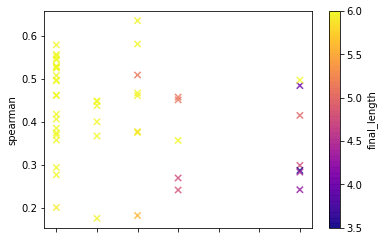

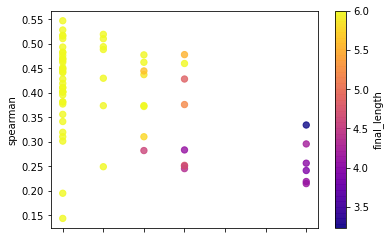

In [626]:
sub_df = df.loc[(df['final_loss'] < 12.)].copy()
sub_df['L'] = sub_df['final_loss']*8
sub_df['C'] = sub_df['ada_len_cost_thresh']*sub_df['length_cost']
sub_df['size'] = sub_df['sender_emb']*sub_df['sender_hidden']*sub_df['sender_nlayers'] / 300
#sub_df['size'] = sub_df['sender_hidden']*sub_df['receiver_nlayers'] / 10
#sub_df['flat_att_F'] = (sub_df['flat_attention'] * 1.0) + ((1-sub_df['flat_attention']) * 0.0)

sub_df.loc[sub_df['flat_attention'] == 'True'].plot.scatter(x = 'C', y = 'spearman', c='final_length', s = 40, marker='x',
                    alpha=0.8, colormap='plasma');
sub_df.loc[sub_df['flat_attention'] == 'False'].plot.scatter(x = 'C', y = 'spearman', c='final_length', s = 40, marker='o',
                    alpha=0.8, colormap='plasma');
#sub_df[['final_length', 'spearman', 'ada_len_cost_thresh', 'C']].sort_values('spearman')


In [367]:
sub_df = df.loc[(df['final_loss'] < 12.)]
fields = ['final_loss', 'final_length', 'spearman', 'lr', 'adam_beta2', 'random_seed',
          'optimizer', 'temperature', 'length_cost', 'ada_len_cost_thresh',
         'sender_nlayers', 'receiver_nlayers', 'flat_attention']
criterion_1 = (df['mode'] == 'gs')
a = df.loc[criterion_1][fields].groupby(['length_cost', 'flat_attention'])
print(a)
a.agg(['mean', 'std', 'count'])

final_loss                 final_length            \
                                 mean       std count         mean       std   
length_cost flat_attention                                                     
0.0         False            9.731642  1.361268    36     5.999941  0.000262   
0.1         False            8.832990  1.310527    15     5.855318  0.364076   
            True             9.997581  1.700285    15     5.897768  0.240138   
0.3         False            9.118578  1.107523    14     4.507224  0.721190   
            True            10.058472  1.472533    12     4.802825  0.731930   

                                  spearman                      lr             \
                           count      mean       std count    mean  std count   
length_cost flat_attention                                                      
0.0         False             36  0.417673  0.086809    36  0.0003  0.0    36   
0.1         False             15  0.415138  0.084863    15  0.0003  0.0    15   
            True              15  0.422896  0.123075    15  0.0003  0.0    15   
0.3         False             14  0.309685  0.090572    14  0.0003  0.0    14   
            True              12  0.357456  0.098266    12  0.0003  0.0    12   

                           adam_beta2                 random_seed            \
                                 mean       std count        mean       std   
length_cost flat_attention                                                    
0.0         False             0.96825  0.043102    36    1.333333  1.218899   
0.1         False             0.90000  0.000000    15    0.866667  1.060099   
            True              0.96840  0.042867    15    1.733333  1.279881   
0.3         False             0.90000  0.000000    14    1.928571  1.206666   
            True              0.96225  0.046125    12    1.583333  1.083625   

                                 temperature                  \
                           count        mean       std count   
length_cost flat_attention                                     
0.0         False             36    1.008333  0.138099    36   
0.1         False             15    1.073333  0.154535    15   
            True              15    1.050000  0.152362    15   
0.3         False             14    1.146429  0.147367    14   
            True              12    1.129167  0.152938    12   

                           ada_len_cost_thresh                 sender_nlayers  \
                                          mean       std count           mean   
length_cost flat_attention                                                      
0.0         False                     0.000000  0.000000    36       2.833333   
0.1         False                     7.666667  2.581989    15       2.866667   
            True                      7.666667  2.581989    15       2.400000   
0.3         False                     7.142857  2.567763    14       2.785714   
            True                      7.916667  2.574643    12       2.583333   

                                           receiver_nlayers                  
                                 std count             mean       std count  
length_cost flat_attention                                                   
0.0         False           1.055597    36         2.555556  1.274911    36  
0.1         False           0.833809    15         2.800000  0.861892    15  
            True            1.298351    15         2.666667  0.975900    15  
0.3         False           0.801784    14         2.928571  0.828742    14  
            True            1.240112    12         2.666667  1.073087    12

In [368]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)

#pd.set_option('display.max_rows', 500)

E = sub_df.sort_values('spearman')[['spearman', 'checkpoint_dir', 'final_length']]
display(E)
print(E.iloc[4].values)
print(E.iloc[8].values)

print(E.iloc[-6].values)

,spearman,checkpoint_dir,final_length
50,0.143611,/Tmp/slurm.987173.0/bosctom/proto_1rNP_adam_sd...,6.000000
71,0.175950,/Tmp/slurm.988342.0/bosctom/proto_1flat_adam_s...,5.967237
84,0.182499,/Tmp/slurm.988358.0/bosctom/proto_1flat_adam_s...,5.594017
32,0.195011,/Tmp/slurm.987151.0/bosctom/proto_1rNP_adam_sd...,6.000000
7,0.214692,/Tmp/slurm.965964.0/bosctom/proto_1r_adam_sd0/...,4.135328
18,0.218945,/Tmp/slurm.965963.0/bosctom/proto_1r_adam_sd0/...,4.108974
6,0.241450,/Tmp/slurm.965958.0/bosctom/proto_1r_adam_sd2/...,3.934473
78,0.241901,/Tmp/slurm.988354.0/bosctom/proto_1flat_adam_s...,4.792023
72,0.242659,/Tmp/slurm.988342.0/bosctom/proto_1flat_adam_s...,4.263533
21,0.245307,/Tmp/slurm.965966.0/bosctom/proto_1r_adam_sd2/...,4.344729


[0.21469185
 '/Tmp/slurm.965964.0/bosctom/proto_1r_adam_sd0/a854d34a66f6488597b9f2e1ea940d2c_I'
 4.135328]
[0.242659
 '/Tmp/slurm.988342.0/bosctom/proto_1flat_adam_sd0/9ec5d18d025cb1905daa50d4771f24b3_I'
 4.2635326]
[0.51754177
 '/Tmp/slurm.987151.0/bosctom/proto_1rNP_adam_sd0/1338ceb08b4022772d2728ca7ba0395c_I'
 6.0]


SpearmanrResult(correlation=0.44623384707306124, pvalue=9.281912258332294e-06)

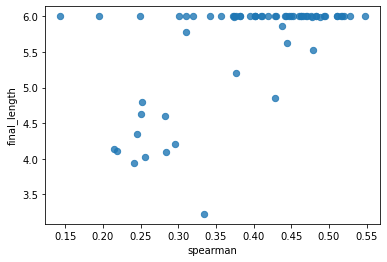

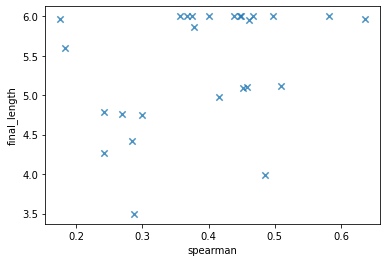

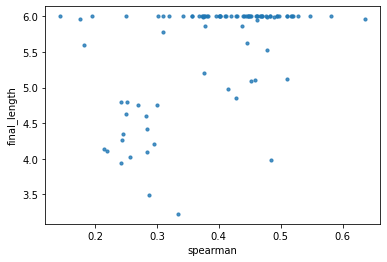

In [381]:
from scipy.stats import spearmanr

sub_df = df.loc[(df['final_loss'] < 12.) & (df['final_length'] < 7) ].copy()
sub_df['flat_att_F'] = sub_df['flat_attention'].astype(bool)#.astype(float) 

sub_df.loc[sub_df['flat_att_F'] == 0.].plot.scatter(x = 'spearman', y = 'final_length', s = 40, marker='o',
                    alpha=0.8, colormap='plasma');

sub_df.loc[sub_df['flat_att_F']].plot.scatter(x = 'spearman', y = 'final_length', s = 40, marker='x',
                    alpha=0.8, colormap='plasma');

sub_df.plot.scatter(x = 'spearman', y = 'final_length', s = 40, marker='.',
                    alpha=0.8, colormap='plasma');
#sub_df[['final_length', 'spearman', 'ada_len_cost_thresh', 'C']].sort_values('spearman')
spearmanr(sub_df['final_length'].tolist(), sub_df['spearman'].tolist())

In [607]:
for i in range(3, 6):
    sub_df = df.loc[(df['final_length'] > i) & (df['final_length'] <= i+1) ].copy()
    sub_df['length_cost_null'] = sub_df['length_cost'] == 0.0
    fields = ['spearman', 'final_loss', 'final_length', 'flat_attention', 'length_cost_null']
    print(sub_df['flat_attention'].values)
    #a = df.loc[criterion_1][fields].groupby(['length_cost', 'flat_attention'])
    #print(a)
    #a.agg(['mean', 'std', 'count'])
    G = sub_df[fields].groupby(['flat_attention', 'length_cost_null'])
    print(i, len(sub_df))
    display(G.agg(['mean', 'std', 'count']))

['False' 'False' 'True' 'True' 'False' 'False']
3 6


spearman                 final_loss  \
                                     mean       std count       mean   
flat_attention length_cost_null                                        
False          False             0.287917  0.065714     2  11.171972   
True           False             0.386062  0.139625     2  10.477612   

                                                final_length                  
                                      std count         mean       std count  
flat_attention length_cost_null                                               
False          False             1.298662     4     3.780271  0.370071     4  
True           False             1.405155     2     3.739672  0.345999     2

['False' 'False' 'False' 'False' 'False' 'False' 'False' 'False' 'False'
 'False' 'True' 'True' 'True' 'True' 'True' 'True' 'False' 'False' 'False'
 'False' 'False']
4 21


spearman                 final_loss  \
                                     mean       std count       mean   
flat_attention length_cost_null                                        
False          False             0.272772  0.060673    10   8.995972   
True           False             0.292117  0.064508     6   9.274796   

                                                final_length                  
                                      std count         mean       std count  
flat_attention length_cost_null                                               
False          False             0.721046    15     4.473789  0.338222    15  
True           False             1.319338     6     4.660375  0.265435     6

['False' 'False' 'False' 'False' 'False' 'False' 'False' 'False' 'False'
 'False' 'False' 'False' 'False' 'False' 'False' 'False' 'False' 'False'
 'False' 'False' 'False' 'False' 'False' 'False' 'False' 'False' 'False'
 'False' 'False' 'False' 'False' 'False' 'False' 'False' 'False' 'False'
 'False' 'False' 'False' 'False' 'False' 'False' 'False' 'False' 'False'
 'False' 'False' 'False' 'False' 'False' 'False' 'False' 'False' 'True'
 'True' 'True' 'True' 'True' 'True' 'True' 'True' 'True' 'True' 'True'
 'True' 'True' 'True' 'True' 'True' 'True' 'True' 'True' 'True' 'True'
 'True' 'True' 'True' 'True' 'True' 'True' 'True' 'True' 'True' 'True'
 'True' 'True' 'True' 'True' 'True' 'True' 'True' 'True' 'True' 'True'
 'True' 'True' 'True' 'True' 'False' 'False' 'False' 'False' 'False'
 'False' 'False' 'False']
5 106


spearman                 final_loss  \
                                     mean       std count       mean   
flat_attention length_cost_null                                        
False          False             0.427006  0.074271    17   8.867890   
               True              0.417673  0.086809    36   9.731642   
True           False             0.426741  0.111494    19  10.213757   
               True              0.453550  0.098656    26  10.650350   

                                                final_length                  
                                      std count         mean       std count  
flat_attention length_cost_null                                               
False          False             1.526164    25     5.846211  0.280324    25  
               True              1.361268    36     5.999941  0.000262    36  
True           False             1.653430    19     5.824149  0.334206    19  
               True              1.523408    26     5.997261  0.013968    26

In [461]:
sub_df = df.loc[(df['final_length'] > 5.9)].copy()
sub_df['length_cost_null'] = sub_df['length_cost'] == 0.0
fields = ['spearman', 'final_loss', 'final_length', 'flat_attention', 'length_cost_null', 'adam_beta2', 'hide_to_send']
G = sub_df[fields].groupby(['flat_attention', 'length_cost_null', 'adam_beta2'])
print(i, len(sub_df))
display(G.agg(['mean', 'std', 'count']))

5 88


spearman                  \
                                                mean       std count   
flat_attention length_cost_null adam_beta2                             
False          False            0.900       0.434366  0.078852    12   
               True             0.900       0.386731  0.088910    10   
                                0.990       0.418202  0.101002    13   
                                0.999       0.440944  0.066815    13   
True           False            0.900       0.413499  0.048758     4   
                                0.990       0.438082  0.151270     7   
                                0.999       0.469360  0.029792     3   
               True             0.900       0.379997  0.078646     8   
                                0.990       0.485492  0.065789     9   
                                0.999       0.486989  0.113401     9   

                                           final_loss                  \
                                                 mean       std count   
flat_attention length_cost_null adam_beta2                              
False          False            0.900        9.130196  1.150510    12   
               True             0.900        8.692382  0.982746    10   
                                0.990        9.893330  1.359869    13   
                                0.999       10.369385  1.209199    13   
True           False            0.900        9.498218  1.440512     4   
                                0.990       10.408447  1.327870     7   
                                0.999       11.596025  1.527863     3   
               True             0.900        9.059157  0.837568     8   
                                0.990       11.107276  1.547967     9   
                                0.999       11.607817  0.666537     9   

                                           final_length                  
                                                   mean       std count  
flat_attention length_cost_null adam_beta2                               
False          False            0.900          5.996676  0.006263    12  
               True             0.900          5.999929  0.000225    10  
                                0.990          5.999890  0.000395    13  
                                0.999          6.000000  0.000000    13  
True           False            0.900          5.987535  0.024929     4  
                                0.990          5.990741  0.015814     7  
                                0.999          6.000000  0.000000     3  
               True             0.900          6.000000  0.000000     8  
                                0.990          6.000000  0.000000     9  
                                0.999          5.992086  0.023742     9

In [463]:
sub_df = df.loc[(df['final_length'] <5)].copy()
sub_df['length_cost_null'] = sub_df['length_cost'] == 0.0
fields = ['spearman', 'final_loss', 'final_length', 'flat_attention', 'length_cost_null', 'adam_beta2', 'hide_to_send']
G = sub_df[fields].groupby(['flat_attention', 'length_cost_null', 'adam_beta2'])
print(i, len(sub_df))
display(G.agg(['mean', 'std', 'count']))

5 20


spearman                  \
                                                mean       std count   
flat_attention length_cost_null adam_beta2                             
False          False            0.900       0.275297  0.058645    12   
True           False            0.900       0.274772  0.024567     4   
                                0.990       0.363347  0.171750     2   
                                0.999       0.349522  0.093290     2   

                                           final_loss                  \
                                                 mean       std count   
flat_attention length_cost_null adam_beta2                              
False          False            0.900        9.134025  1.156693    12   
True           False            0.900        9.086460  0.435063     4   
                                0.990        9.966661  2.127748     2   
                                0.999       10.162416  2.408553     2   

                                           final_length                  
                                                   mean       std count  
flat_attention length_cost_null adam_beta2                               
False          False            0.900          4.247211  0.447668    12  
True           False            0.900          4.316061  0.593993     4  
                                0.990          4.388176  0.571125     2  
                                0.999          4.700499  0.396362     2

In [471]:
sub_df = df.loc[(df['final_length'] > 5.9)].copy()
sub_df['length_cost_null'] = sub_df['length_cost'] == 0.0
fields = ['spearman', 'final_loss', 'final_length', 'flat_attention', 'length_cost_null', 'adam_beta2',
          'hide_to_send', 'sender_nlayers', 'receiver_nlayers']
G = sub_df[fields].groupby(['receiver_nlayers'])
print(i, len(sub_df))
display(G.agg(['mean', 'std', 'count']))

5 88


spearman                 final_loss                  \
                      mean       std count       mean       std count   
receiver_nlayers                                                        
1.0               0.396588  0.106309    21   9.177939  1.325336    21   
2.0               0.448930  0.080481    20  10.111343  1.609089    20   
3.0               0.456151  0.075956    17  10.152041  1.649437    17   
4.0               0.436935  0.095213    30  10.496744  1.193445    30   

                 final_length                 length_cost_null            \
                         mean       std count             mean       std   
receiver_nlayers                                                           
1.0                  5.994200  0.018511    21         0.952381  0.218218   
2.0                  5.998789  0.003755    20         0.600000  0.502625   
3.0                  5.997109  0.008493    17         0.529412  0.514496   
4.0                  5.998908  0.005982    30         0.700000  0.466092   

                       adam_beta2                 sender_nlayers            \
                 count       mean       std count           mean       std   
receiver_nlayers                                                             
1.0                 21   0.954000  0.048047    21       2.857143  0.910259   
2.0                 20   0.965250  0.043982    20       2.600000  1.046297   
3.0                 17   0.944471  0.048724    17       2.588235  1.175735   
4.0                 30   0.963000  0.045463    30       2.600000  1.101723   

                        
                 count  
receiver_nlayers        
1.0                 21  
2.0                 20  
3.0                 17  
4.0                 30

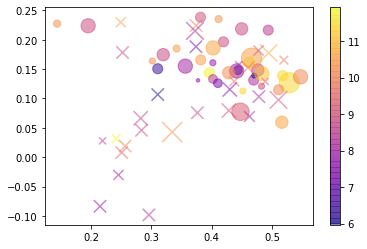

In [577]:
import matplotlib.pyplot as plt

sub_df = df.loc[(df['final_length'] <=6.0)].copy()
#print(len(sub_df))
#display(sub_df[['spearman', 'spearman_ctx']])
sub_df['length_cost_null'] = sub_df['length_cost'] == 0.0

sub_df['C'] = sub_df['ada_len_cost_thresh']*sub_df['length_cost']
sub_df['size'] = sub_df['sender_emb']*sub_df['sender_hidden']*sub_df['sender_nlayers']*sub_df['receiver_nlayers'] / 500

NPsub_df = sub_df[sub_df['length_cost_null']]
Psub_df = sub_df[~sub_df['length_cost_null']]

plt.scatter(NPsub_df['spearman'], NPsub_df['spearman_ctx'], 
            c=NPsub_df['final_loss'], s=NPsub_df['size'], marker='o',
            alpha=0.5, cmap='plasma')
plt.scatter(Psub_df['spearman'], Psub_df['spearman_ctx'], 
            c=Psub_df['final_loss'], s=Psub_df['size'], marker='x',
            alpha=0.5, cmap='plasma')
plt.colorbar()

array([[<AxesSubplot:xlabel='spearman', ylabel='spearman'>,
        <AxesSubplot:xlabel='spearman_ctx', ylabel='spearman'>,
        <AxesSubplot:xlabel='final_length', ylabel='spearman'>,
        <AxesSubplot:xlabel='size', ylabel='spearman'>,
        <AxesSubplot:xlabel='final_loss', ylabel='spearman'>,
        <AxesSubplot:xlabel='adam_beta2', ylabel='spearman'>,
        <AxesSubplot:xlabel='C', ylabel='spearman'>],
       [<AxesSubplot:xlabel='spearman', ylabel='spearman_ctx'>,
        <AxesSubplot:xlabel='spearman_ctx', ylabel='spearman_ctx'>,
        <AxesSubplot:xlabel='final_length', ylabel='spearman_ctx'>,
        <AxesSubplot:xlabel='size', ylabel='spearman_ctx'>,
        <AxesSubplot:xlabel='final_loss', ylabel='spearman_ctx'>,
        <AxesSubplot:xlabel='adam_beta2', ylabel='spearman_ctx'>,
        <AxesSubplot:xlabel='C', ylabel='spearman_ctx'>],
       [<AxesSubplot:xlabel='spearman', ylabel='final_length'>,
        <AxesSubplot:xlabel='spearman_ctx', ylabel='final_length

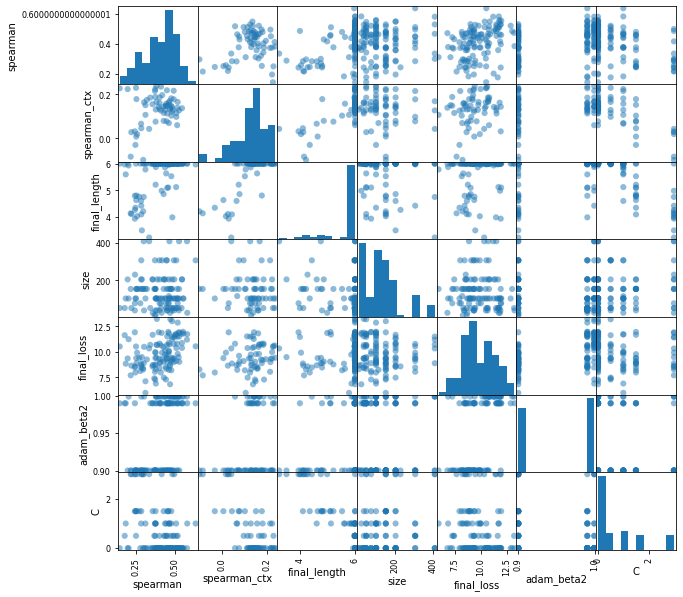

In [581]:
pd.plotting.scatter_matrix(sub_df[['spearman', 'spearman_ctx', 'final_length', 'size', 'final_loss', 'adam_beta2', 'C']], figsize=(10,10), s=150) #marker = 'o', hist_kwds = {'bins': 10}, s = 60, alpha = 0.8)